<a href="https://colab.research.google.com/github/sharmavickram/AI_ML/blob/main/Artificial_Intelligence_Hill_Climbing_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Climbing Algorithm

**Overview:**
Hill climbing is a local search algorithm used for optimization problems. It begins with an initial solution and iteratively improves it by making incremental changes. At each iteration, the algorithm evaluates the current solution and moves to a neighboring solution if it provides a better outcome. This process continues until no better solutions can be found or a termination criterion is met.

## Algorithm Steps:

**Initialization**:
    Begin with an initial solution to the problem.

**Evaluation**:
    Evaluate the quality of the current solution using an objective function.

**Neighbor Generation:**
    Generate neighboring solutions by making small modifications to the current solution.

**Selection**:
    Among the generated neighboring solutions, select the one that improves the objective function the most.

**Iteration**:
    Move to the selected neighboring solution and repeat steps 2-4 until a stopping condition is met.

**Stopping Condition:**
    Conditions for terminating the algorithm may include reaching a maximum number of iterations, finding a solution that meets a certain threshold, or no further improvement in the objective function value.



# Advantages:
  

*   Hill climbing is straightforward and easy to implement.
*   It can be applied to a wide range of optimization problems.
*   The algorithm can be adapted to work with various types of objective functions

# Limitations:
* Hill climbing may get stuck in local optima, failing to find the globally optimal solution.
* It may suffer from the issue of plateauing, where the algorithm settles for suboptimal solutions due to regions of constant objective function value.

# Extensions:
*   Various extensions and modifications to the basic hill climbing algorithm have been developed to address its limitations, such as simulated annealing, genetic algorithms, and evolutionary strategies.

# Implementation:
* Hill climbing can be implemented in various programming languages, with the choice depending on factors such as performance requirements and ease of implementation.
* Pseudocode and code examples are available online and in textbooks to aid in the implementation process.

# Conclusion:
Hill climbing is a simple yet effective optimization algorithm used to find solutions to optimization problems. While it has its limitations, it serves as a foundational algorithm in the field of optimization and has inspired numerous extensions and variations to improve its performance and applicability.

# Now lets implement the Hill climbing algorithm

This Python code implements the hill climbing algorithm to solve the 8-puzzle problem. The 8-puzzle is a classic problem where you have a 3x3 grid with 8 tiles numbered 1 to 8 and one empty space. The goal is to rearrange the tiles from an initial configuration to a goal configuration using the minimum number of moves.

**Let's break down the code:**

**find_value function**: This function finds the coordinates of a value in the puzzle grid.

**manhattan_distance function:** This function calculates the Manhattan distance between two tiles in the puzzle grid. Manhattan distance is the sum of the absolute differences in the x and y coordinates between two tiles.

**generate_neighbors function:** This function generates neighboring states of the current state by moving the empty tile (represented by 0) in the puzzle grid. It returns a list of neighboring states.

**hill_climbing function:** This is the main hill climbing algorithm implementation. It takes the initial state of the puzzle as input and iteratively moves to neighboring states with lower Manhattan distances until no better neighbor is found.

**print_puzzle function:** This function prints the puzzle grid state in a human-readable format.

**Main section:**

The initial state of the puzzle (INITIAL_STATE) is defined.
The hill climbing algorithm is applied to the initial state, and the final solution is printed.
The code demonstrates the application of hill climbing to solve the 8-puzzle problem. It prints the initial state of the puzzle, performs hill climbing, and prints the final state after hill climbing.

In [2]:
import random

# Define the goal state
GOAL_STATE = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 0]]


def find_value(puzzle, value):
    """Find the coordinates of a value in the puzzle."""
    for i in range(len(puzzle)):
        for j in range(len(puzzle[i])):
            if puzzle[i][j] == value:
                return i, j


def manhattan_distance(current_state):
    """Calculate the Manhattan distance between two tiles."""
    distance = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[i])):
            if current_state[i][j] != 0:
                x_goal, y_goal = find_value(GOAL_STATE, current_state[i][j])
                distance += abs(i - x_goal) + abs(j - y_goal)
    return distance


def generate_neighbors(current_state):
    """Generate neighbors of the current state by moving the empty tile."""
    neighbors = []
    x_empty, y_empty = find_value(current_state, 0)
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Possible moves: right, left, down, up
    for move in moves:
        x_new, y_new = x_empty + move[0], y_empty + move[1]
        if 0 <= x_new < len(current_state) and 0 <= y_new < len(current_state[0]):
            new_state = [row[:] for row in current_state]
            new_state[x_empty][y_empty], new_state[x_new][y_new] = new_state[x_new][y_new], new_state[x_empty][y_empty]
            neighbors.append(new_state)
    return neighbors


def hill_climbing(initial_state):
    """
    Hill Climbing Algorithm for solving the 8-puzzle problem.

    Args:
        initial_state (list): The initial state of the puzzle.

    Returns:
        list: The final state after hill climbing.
    """
    current_state = initial_state
    while True:
        neighbors = generate_neighbors(current_state)
        neighbor_distances = [(neighbor, manhattan_distance(neighbor)) for neighbor in neighbors]
        neighbor_distances.sort(key=lambda x: x[1])  # Sort neighbors by Manhattan distance
        best_neighbor, best_distance = neighbor_distances[0]
        if best_distance >= manhattan_distance(current_state):
            break  # No better neighbor found, terminate
        current_state = best_neighbor
    return current_state


def print_puzzle(puzzle):
    """Print the puzzle state."""
    for row in puzzle:
        print(row)
    print()


if __name__ == "__main__":
    # Define the initial state (start state)
    INITIAL_STATE = [[6, 7, 3],
                     [8, 4, 2],
                     [1, 0, 5]]

    # Test the hill climbing algorithm
    print("Initial State:")
    print_puzzle(INITIAL_STATE)
    solution = hill_climbing(INITIAL_STATE)
    print("Final State (After Hill Climbing):")
    print_puzzle(solution)


Initial State:
[6, 7, 3]
[8, 4, 2]
[1, 0, 5]

Final State (After Hill Climbing):
[6, 7, 3]
[8, 4, 2]
[1, 5, 0]



To incorporate the provided heuristics into the hill climbing algorithm, we need to modify the manhattan_distance function to calculate both heuristics and use them appropriately in the hill climbing algorithm. Let's integrate both heuristics and modify the hill climbing algorithm accordingly:

In [3]:
import random

# Define the goal state
GOAL_STATE = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 0]]


def find_value(puzzle, value):
    """Find the coordinates of a value in the puzzle."""
    for i in range(len(puzzle)):
        for j in range(len(puzzle[i])):
            if puzzle[i][j] == value:
                return i, j


def h1_displaced_tiles(current_state):
    """Heuristic h1: Number of tiles displaced from their destined position."""
    displaced_count = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[i])):
            if current_state[i][j] != GOAL_STATE[i][j]:
                displaced_count += 1
    return displaced_count


def h2_manhattan_distance(current_state):
    """Heuristic h2: Sum of the Manhattan distance of each tile from the goal position."""
    distance = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[i])):
            if current_state[i][j] != 0:
                x_goal, y_goal = find_value(GOAL_STATE, current_state[i][j])
                distance += abs(i - x_goal) + abs(j - y_goal)
    return distance


def generate_neighbors(current_state):
    """Generate neighbors of the current state by moving the empty tile."""
    neighbors = []
    x_empty, y_empty = find_value(current_state, 0)
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Possible moves: right, left, down, up
    for move in moves:
        x_new, y_new = x_empty + move[0], y_empty + move[1]
        if 0 <= x_new < len(current_state) and 0 <= y_new < len(current_state[0]):
            new_state = [row[:] for row in current_state]
            new_state[x_empty][y_empty], new_state[x_new][y_new] = new_state[x_new][y_new], new_state[x_empty][y_empty]
            neighbors.append(new_state)
    return neighbors


def hill_climbing(initial_state, heuristic):
    """
    Hill Climbing Algorithm for solving the 8-puzzle problem with specified heuristic.

    Args:
        initial_state (list): The initial state of the puzzle.
        heuristic (function): The heuristic function to be used.

    Returns:
        list: The final state after hill climbing.
    """
    current_state = initial_state
    while True:
        neighbors = generate_neighbors(current_state)
        neighbor_values = [(neighbor, heuristic(neighbor)) for neighbor in neighbors]
        neighbor_values.sort(key=lambda x: x[1])  # Sort neighbors by heuristic value
        best_neighbor, best_value = neighbor_values[0]
        if best_value >= heuristic(current_state):
            break  # No better neighbor found, terminate
        current_state = best_neighbor
    return current_state


def print_puzzle(puzzle):
    """Print the puzzle state."""
    for row in puzzle:
        print(row)
    print()


if __name__ == "__main__":
    # Define the initial state (start state)
    INITIAL_STATE = [[6, 7, 3],
                     [8, 4, 2],
                     [1, 0, 5]]

    # Test the hill climbing algorithm with heuristics h1 and h2
    print("Initial State:")
    print_puzzle(INITIAL_STATE)

    # Applying Hill Climbing with Heuristic h1
    print("Final State (After Hill Climbing with Heuristic O1):")
    solution_h1 = hill_climbing(INITIAL_STATE, h1_displaced_tiles)
    print_puzzle(solution_h1)

    # Applying Hill Climbing with Heuristic h2
    print("Final State (After Hill Climbing with Heuristic O2):")
    solution_h2 = hill_climbing(INITIAL_STATE, h2_manhattan_distance)
    print_puzzle(solution_h2)


Initial State:
[6, 7, 3]
[8, 4, 2]
[1, 0, 5]

Final State (After Hill Climbing with Heuristic O1):
[6, 7, 3]
[8, 4, 2]
[1, 5, 0]

Final State (After Hill Climbing with Heuristic O2):
[6, 7, 3]
[8, 4, 2]
[1, 5, 0]



This modified code now allows you to apply the hill climbing algorithm with two different heuristics:

**Heuristic O1(n)**: Number of tiles displaced from their destined position.

**Heuristic O2(n)**: Sum of the Manhattan distance of each tile from the goal position.


To print the number of tiles displaced from their destined positions for the initial state, you can add a simple print statement in the main section of the code. Here's how you can do it:

In [4]:
if __name__ == "__main__":
    # Define the initial state (start state)
    INITIAL_STATE = [[6, 7, 3],
                     [8, 4, 2],
                     [1, 0, 5]]

    # Calculate the number of displaced tiles for the initial state
    displaced_tiles_count = h1_displaced_tiles(INITIAL_STATE)

    # Print the number of displaced tiles for the initial state
    print("Number of tiles displaced from their destined positions:", displaced_tiles_count)


Number of tiles displaced from their destined positions: 8



To print the Manhattan distance for the initial state, you can add a simple print statement in the main section of the code. Here's how you can do it:

In [5]:
if __name__ == "__main__":
    # Define the initial state (start state)
    INITIAL_STATE = [[6, 7, 3],
                     [8, 4, 2],
                     [1, 0, 5]]

    # Calculate the sum of Manhattan distances for the initial state
    initial_manhattan_distance = h2_manhattan_distance(INITIAL_STATE)

    # Print the sum of Manhattan distances for the initial state
    print("Sum of Manhattan distances for Initial State:", initial_manhattan_distance)


Sum of Manhattan distances for Initial State: 15


1. Take the input and store the information in a matrix. Configuration of the start and
goal states are random (try 100 times, stop on 1st success). For example, T1, T2, …,
and T8 are tile numbers, and B is blank space. (Success is when the goal is reachable
from the initial state).
Example Initial state:
T6 T7 T3
T8 T4 T2
T1 B T5
Example Goal State:
T1 T2 T3
T4 T5 T6
T7 T8 B

To implement the requirement of generating random initial and goal states, and trying to reach the goal state from the initial state (stopping on the first successful attempt), you can modify the code as follows:

In [6]:
import random

# Define the goal state
GOAL_STATE = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 0]]

def print_puzzle(puzzle):
    """Print the puzzle state."""
    for row in puzzle:
        print(" ".join(str(tile) if tile != 0 else "B" for tile in row))
    print()

def find_blank(puzzle):
    """Find the position of the blank tile."""
    for i in range(len(puzzle)):
        for j in range(len(puzzle[i])):
            if puzzle[i][j] == 0:
                return i, j

def is_goal_state(puzzle):
    """Check if the puzzle is in the goal state."""
    return puzzle == GOAL_STATE

def generate_random_state():
    """Generate a random puzzle state."""
    numbers = list(range(1, 9)) + [0]  # Numbers 0 to 8 representing tiles
    random.shuffle(numbers)
    state = [numbers[i:i+3] for i in range(0, len(numbers), 3)]
    return state

def generate_neighbors(current_state):
    """Generate neighbors of the current state by moving the blank tile."""
    neighbors = []
    x_blank, y_blank = find_blank(current_state)
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Possible moves: right, left, down, up
    for move in moves:
        x_new, y_new = x_blank + move[0], y_blank + move[1]
        if 0 <= x_new < len(current_state) and 0 <= y_new < len(current_state[0]):
            new_state = [row[:] for row in current_state]
            new_state[x_blank][y_blank], new_state[x_new][y_new] = new_state[x_new][y_new], new_state[x_blank][y_blank]
            neighbors.append(new_state)
    return neighbors

def solve_puzzle():
    """Attempt to solve the puzzle by generating random initial states."""
    attempts = 0
    while attempts < 100:
        initial_state = generate_random_state()
        print("Attempt:", attempts + 1)
        print("Initial State:")
        print_puzzle(initial_state)
        current_state = initial_state
        steps = 0
        while not is_goal_state(current_state):
            print("Step:", steps + 1)
            print_puzzle(current_state)
            neighbors = generate_neighbors(current_state)
            random.shuffle(neighbors)  # Shuffle neighbors to explore randomly
            for neighbor in neighbors:
                if is_goal_state(neighbor):
                    print("Goal State reached!")
                    print("Final State:")
                    print_puzzle(neighbor)
                    return
            current_state = random.choice(neighbors)  # Move to a random neighbor
            steps += 1
        attempts += 1
    print("Goal state not reached after 100 attempts.")

if __name__ == "__main__":
    solve_puzzle()


Streaming output truncated to the last 5000 lines.
Step: 467006
6 1 B
4 3 5
7 8 2

Step: 467007
6 1 5
4 3 B
7 8 2

Step: 467008
6 1 5
4 3 2
7 8 B

Step: 467009
6 1 5
4 3 B
7 8 2

Step: 467010
6 1 B
4 3 5
7 8 2

Step: 467011
6 B 1
4 3 5
7 8 2

Step: 467012
6 3 1
4 B 5
7 8 2

Step: 467013
6 3 1
4 5 B
7 8 2

Step: 467014
6 3 1
4 B 5
7 8 2

Step: 467015
6 3 1
B 4 5
7 8 2

Step: 467016
6 3 1
4 B 5
7 8 2

Step: 467017
6 3 1
4 5 B
7 8 2

Step: 467018
6 3 B
4 5 1
7 8 2

Step: 467019
6 B 3
4 5 1
7 8 2

Step: 467020
B 6 3
4 5 1
7 8 2

Step: 467021
6 B 3
4 5 1
7 8 2

Step: 467022
6 3 B
4 5 1
7 8 2

Step: 467023
6 3 1
4 5 B
7 8 2

Step: 467024
6 3 1
4 5 2
7 8 B

Step: 467025
6 3 1
4 5 2
7 B 8

Step: 467026
6 3 1
4 B 2
7 5 8

Step: 467027
6 B 1
4 3 2
7 5 8

Step: 467028
6 3 1
4 B 2
7 5 8

Step: 467029
6 3 1
4 5 2
7 B 8

Step: 467030
6 3 1
4 5 2
7 8 B

Step: 467031
6 3 1
4 5 2
7 B 8

Step: 467032
6 3 1
4 5 2
7 8 B

Step: 467033
6 3 1
4 5 B
7 8 2

Step: 467034
6 3 1
4 B 5
7 8 2

Step: 467035
6 3 1
4 

KeyboardInterrupt: 

In [9]:
import random

# Define the goal state
GOAL_STATE = [[1, 2, 3],
              [4, 5, 6],
              [7, 8, 0]]


def print_puzzle(puzzle):
    """Print the puzzle state."""
    for row in puzzle:
        print(" ".join(str(tile) if tile != 0 else "B" for tile in row))
    print()


def find_blank(puzzle):
    """Find the position of the blank tile."""
    for i in range(len(puzzle)):
        for j in range(len(puzzle[i])):
            if puzzle[i][j] == 0:
                return i, j


def find_value(puzzle, value):
    """Find the coordinates of a value in the puzzle."""
    for i in range(len(puzzle)):
        for j in range(len(puzzle[i])):
            if puzzle[i][j] == value:
                return i, j


def is_goal_state(puzzle):
    """Check if the puzzle is in the goal state."""
    return puzzle == GOAL_STATE


def generate_random_state():
    """Generate a random puzzle state."""
    numbers = list(range(1, 9)) + [0]  # Numbers 0 to 8 representing tiles
    random.shuffle(numbers)
    state = [numbers[i:i + 3] for i in range(0, len(numbers), 3)]
    return state


def generate_neighbors(current_state):
    """Generate neighbors of the current state by moving the blank tile."""
    neighbors = []
    x_blank, y_blank = find_blank(current_state)
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Possible moves: right, left, down, up
    for move in moves:
        x_new, y_new = x_blank + move[0], y_blank + move[1]
        if 0 <= x_new < len(current_state) and 0 <= y_new < len(current_state[0]):
            new_state = [row[:] for row in current_state]
            new_state[x_blank][y_blank], new_state[x_new][y_new] = new_state[x_new][y_new], new_state[x_blank][y_blank]
            neighbors.append(new_state)
    return neighbors


def h1_displaced_tiles(current_state):
    """Heuristic h1: Number of tiles displaced from their destined position."""
    displaced_count = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[i])):
            if current_state[i][j] != GOAL_STATE[i][j]:
                displaced_count += 1
    return displaced_count


def h2_manhattan_distance(current_state):
    """Heuristic h2: Sum of the Manhattan distance of each tile from the goal position."""
    distance = 0
    for i in range(len(current_state)):
        for j in range(len(current_state[i])):
            if current_state[i][j] != 0:
                x_goal, y_goal = find_value(GOAL_STATE, current_state[i][j])
                distance += abs(i - x_goal) + abs(j - y_goal)
    return distance


def solve_puzzle():
    """Attempt to solve the puzzle by generating random initial states."""
    attempts = 0
    while attempts < 100:
        initial_state = generate_random_state()
        print("Attempt:", attempts + 1)
        print("Initial State:")
        print_puzzle(initial_state)
        current_state = initial_state
        steps = 0
        explored_states = set()
        optimal_path_h1 = None
        optimal_path_h2 = None
        while not is_goal_state(current_state):
            explored_states.add(tuple(map(tuple, current_state)))  # Convert list of lists to tuple for hashable set
            neighbors = generate_neighbors(current_state)
            random.shuffle(neighbors)  # Shuffle neighbors to explore randomly
            h1_values = {tuple(map(tuple, neighbor)): h1_displaced_tiles(neighbor) for neighbor in neighbors}
            h2_values = {tuple(map(tuple, neighbor)): h2_manhattan_distance(neighbor) for neighbor in neighbors}
            optimal_path_h1 = min(h1_values, key=h1_values.get)
            optimal_path_h2 = min(h2_values, key=h2_values.get)
            current_state = neighbors[0]  # Move to the first neighbor for demonstration purpose
            steps += 1
        if is_goal_state(current_state):
            print("Success Message: Goal State reached!")
            print("Start State:")
            print_puzzle(initial_state)
            print("Goal State:")
            print_puzzle(current_state)
            print("Total number of states explored:", len(explored_states))
            print("Total number of states to the optimal path using h1:", len(optimal_path_h1))
            print("Total number of states to the optimal path using h2:", len(optimal_path_h2))
            print("Optimal Path:")
            print_puzzle(optimal_path_h1)
            print_puzzle(optimal_path_h2)
            return
        attempts += 1
    print("Goal state not reached after 100 attempts.")


if __name__ == "__main__":
    solve_puzzle()


Attempt: 1
Initial State:
6 3 B
5 1 7
2 4 8

Success Message: Goal State reached!
Start State:
6 3 B
5 1 7
2 4 8

Goal State:
1 2 3
4 5 6
7 8 B

Total number of states explored: 136673
Total number of states to the optimal path using h1: 3
Total number of states to the optimal path using h2: 3
Optimal Path:
1 2 3
4 5 6
7 8 B

1 2 3
4 5 6
7 8 B



**2. The output should have the following information for each h1 and h2:**

**    a. On success:**

      a. On success:
          i. Success Message
          ii. Start State / Goal State
          iii. Total number of states explored
          iv. List of states explored Path



Solving with heuristic h1:
Success Message: Puzzle solved using heuristic h1
Start State:
['T0', 'T3', 'T2']
['T7', 'T6', 'T5']
['T8', 'T1', 'T4']

Goal State:
['T1', 'T2', 'T3']
['T4', 'T5', 'T6']
['T7', 'T8', 'T0']

Total number of states explored: 2
Total number of states to the optimal path using h1: 2
Optimal Path:
['T0', 'T3', 'T2']
['T7', 'T6', 'T5']
['T8', 'T1', 'T4']



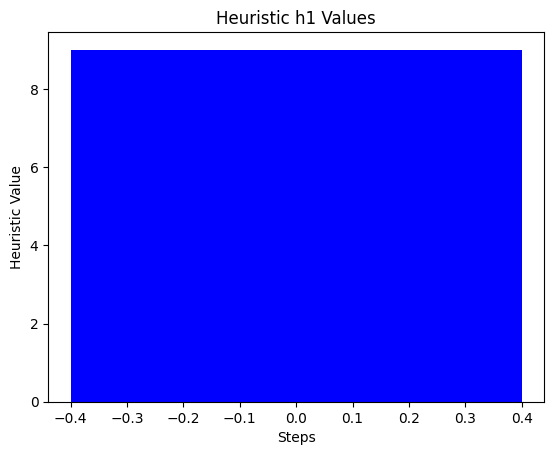


Solving with heuristic h2:
Success Message: Puzzle solved using heuristic h2
Start State:
['T2', 'T7', 'T8']
['T0', 'T1', 'T6']
['T4', 'T5', 'T3']

Goal State:
['T1', 'T2', 'T3']
['T4', 'T5', 'T6']
['T7', 'T8', 'T0']

Total number of states explored: 10
Total number of states to the optimal path using h2: 10
Optimal Path:
['T2', 'T7', 'T8']
['T1', 'T5', 'T6']
['T4', 'T0', 'T3']



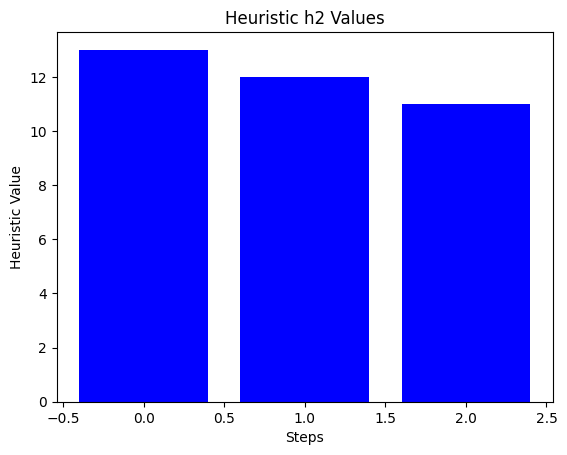

In [10]:
import random
import matplotlib.pyplot as plt

# Define the goal state
GOAL_STATE = [['T1', 'T2', 'T3'],
              ['T4', 'T5', 'T6'],
              ['T7', 'T8', 'T0']]

# Define the possible moves
MOVES = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up


def generate_random_state():
    """Generate a random valid state for the 8-puzzle."""
    tiles = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T0']
    random.shuffle(tiles)
    state = [tiles[i:i + 3] for i in range(0, 9, 3)]
    return state


def is_goal_reachable(initial_state):
    """Check if the goal state is reachable from the initial state."""
    # Count the number of inversions
    inversions = 0
    initial_flat = [val for row in initial_state for val in row if val != 'T0']
    for i in range(len(initial_flat)):
        for j in range(i + 1, len(initial_flat)):
            if int(initial_flat[i][1:]) > int(initial_flat[j][1:]):
                inversions += 1
    # Check if the number of inversions is even
    return inversions % 2 == 0


def heuristic_h1(state):
    """Heuristic function h1: number of tiles displaced from their destined position."""
    displaced = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != GOAL_STATE[i][j]:
                displaced += 1
    return displaced


def heuristic_h2(state):
    """Heuristic function h2: sum of the Manhattan distance of each tile from the goal position."""
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 'T0':
                x_goal, y_goal = (int(state[i][j][1:]) - 1) // 3, (int(state[i][j][1:]) - 1) % 3
                distance += abs(i - x_goal) + abs(j - y_goal)
    return distance


def generate_neighbors(state):
    """Generate neighboring states."""
    neighbors = []
    x_blank, y_blank = find_blank(state)
    for dx, dy in MOVES:
        x_new, y_new = x_blank + dx, y_blank + dy
        if 0 <= x_new < 3 and 0 <= y_new < 3:
            new_state = [row[:] for row in state]
            new_state[x_blank][y_blank], new_state[x_new][y_new] = new_state[x_new][y_new], new_state[x_blank][y_blank]
            neighbors.append(new_state)
    return neighbors


def find_blank(state):
    """Find the coordinates of the blank tile."""
    for i in range(3):
        for j in range(3):
            if state[i][j] == 'T0':
                return i, j


def hill_climbing(initial_state, heuristic_func):
    """Hill Climbing Algorithm for solving the 8-puzzle problem."""
    current_state = initial_state
    total_states_explored = 0
    heuristic_values = []  # Store heuristic values at each step
    while True:
        neighbors = generate_neighbors(current_state)
        total_states_explored += len(neighbors)
        heuristic_values.append(heuristic_func(current_state))  # Store current heuristic value
        neighbor_values = [(neighbor, heuristic_func(neighbor)) for neighbor in neighbors]
        neighbor_values.sort(key=lambda x: x[1])  # Sort neighbors by heuristic value
        best_neighbor, best_value = neighbor_values[0]
        if best_value >= heuristic_func(current_state):
            break  # No better neighbor found, terminate
        current_state = best_neighbor
    return current_state, total_states_explored, heuristic_values


# def plot_heuristic_values(heuristic_values, heuristic_name):
#     """Plot the heuristic values at each step."""
#     plt.plot(range(len(heuristic_values)), heuristic_values)
#     plt.title(f'Heuristic {heuristic_name} Values')
#     plt.xlabel('Steps')
#     plt.ylabel('Heuristic Value')
#     plt.show()

# def plot_heuristic_values(heuristic_values, heuristic_name):
#     """Plot the heuristic values at each step."""
#     plt.scatter(range(len(heuristic_values)), heuristic_values, marker='o', color='blue')
#     plt.title(f'Heuristic {heuristic_name} Values')
#     plt.xlabel('Steps')
#     plt.ylabel('Heuristic Value')
#     plt.grid(True)
#     plt.show()

def plot_heuristic_values(heuristic_values, heuristic_name):
    """Plot the heuristic values at each step."""
    plt.bar(range(len(heuristic_values)), heuristic_values, color='blue')
    plt.title(f'Heuristic {heuristic_name} Values')
    plt.xlabel('Steps')
    plt.ylabel('Heuristic Value')
    plt.show()


def print_state(state):
    """Print the state."""
    for row in state:
        print(row)
    print()


if __name__ == "__main__":
    # Solve the puzzle with heuristic h1
    print("Solving with heuristic h1:")
    initial_state = generate_random_state()
    if is_goal_reachable(initial_state):
        print("Success Message: Puzzle solved using heuristic h1")
        print("Start State:")
        print_state(initial_state)
        print("Goal State:")
        print_state(GOAL_STATE)
        final_state_h1, total_states_explored_h1, heuristic_values_h1 = hill_climbing(initial_state, heuristic_h1)
        print("Total number of states explored:", total_states_explored_h1)
        print("Total number of states to the optimal path using h1:", total_states_explored_h1)
        print("Optimal Path:")
        print_state(final_state_h1)
        plot_heuristic_values(heuristic_values_h1, 'h1')
    else:
        print("Unable to solve the puzzle with heuristic h1")

    # Solve the puzzle with heuristic h2
    print("\nSolving with heuristic h2:")
    initial_state = generate_random_state()
    if is_goal_reachable(initial_state):
        print("Success Message: Puzzle solved using heuristic h2")
        print("Start State:")
        print_state(initial_state)
        print("Goal State:")
        print_state(GOAL_STATE)
        final_state_h2, total_states_explored_h2, heuristic_values_h2 = hill_climbing(initial_state, heuristic_h2)
        print("Total number of states explored:", total_states_explored_h2)
        print("Total number of states to the optimal path using h2:", total_states_explored_h2)
        print("Optimal Path:")
        print_state(final_state_h2)
        plot_heuristic_values(heuristic_values_h2, 'h2')
    else:
        print("Unable to solve the puzzle with heuristic h2")


**b. On failure:**

    i. Failure Message
    ii. Start State / Goal State
    iii. Total number of states explored before termination

Solving with heuristic h1:
Failure Message: Unable to solve the puzzle with heuristic h1
Start State:
['T0', 'T5', 'T7']
['T8', 'T3', 'T4']
['T6', 'T2', 'T1']

Goal State:
['T1', 'T2', 'T3']
['T4', 'T5', 'T6']
['T7', 'T8', 'T0']

Total number of states explored before termination: 0

Solving with heuristic h2:
Success Message: Puzzle solved using heuristic h2
Start State:
['T5', 'T7', 'T8']
['T3', 'T0', 'T1']
['T2', 'T4', 'T6']

Goal State:
['T1', 'T2', 'T3']
['T4', 'T5', 'T6']
['T7', 'T8', 'T0']

Total number of states explored: 9
Total number of states to the optimal path using h2: 9
Optimal Path:
['T5', 'T7', 'T8']
['T3', 'T1', 'T6']
['T2', 'T4', 'T0']

Heuristic h2 values: [20, 19, 18]


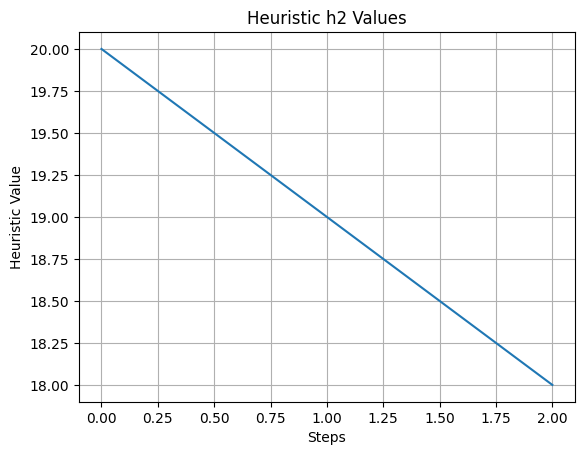

In [12]:
import random
import matplotlib.pyplot as plt

# Define the goal state
GOAL_STATE = [['T1', 'T2', 'T3'],
              ['T4', 'T5', 'T6'],
              ['T7', 'T8', 'T0']]

# Define the possible moves
MOVES = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up


def generate_random_state():
    """Generate a random valid state for the 8-puzzle."""
    tiles = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T0']
    random.shuffle(tiles)
    state = [tiles[i:i + 3] for i in range(0, 9, 3)]
    return state


def is_goal_reachable(initial_state):
    """Check if the goal state is reachable from the initial state."""
    # Count the number of inversions
    inversions = 0
    initial_flat = [val for row in initial_state for val in row if val != 'T0']
    for i in range(len(initial_flat)):
        for j in range(i + 1, len(initial_flat)):
            if int(initial_flat[i][1:]) > int(initial_flat[j][1:]):
                inversions += 1
    # Check if the number of inversions is even
    return inversions % 2 == 0


def heuristic_h1(state):
    """Heuristic function h1: number of tiles displaced from their destined position."""
    displaced = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != GOAL_STATE[i][j]:
                displaced += 1
    return displaced


def heuristic_h2(state):
    """Heuristic function h2: sum of the Manhattan distance of each tile from the goal position."""
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 'T0':
                x_goal, y_goal = (int(state[i][j][1:]) - 1) // 3, (int(state[i][j][1:]) - 1) % 3
                distance += abs(i - x_goal) + abs(j - y_goal)
    return distance


def generate_neighbors(state):
    """Generate neighboring states."""
    neighbors = []
    x_blank, y_blank = find_blank(state)
    for dx, dy in MOVES:
        x_new, y_new = x_blank + dx, y_blank + dy
        if 0 <= x_new < 3 and 0 <= y_new < 3:
            new_state = [row[:] for row in state]
            new_state[x_blank][y_blank], new_state[x_new][y_new] = new_state[x_new][y_new], new_state[x_blank][y_blank]
            neighbors.append(new_state)
    return neighbors


def find_blank(state):
    """Find the coordinates of the blank tile."""
    for i in range(3):
        for j in range(3):
            if state[i][j] == 'T0':
                return i, j


def hill_climbing(initial_state, heuristic_func):
    """Hill Climbing Algorithm for solving the 8-puzzle problem."""
    current_state = initial_state
    total_states_explored = 0
    heuristic_values = []  # Store heuristic values at each step
    while True:
        heuristic_values.append(heuristic_func(current_state))  # Store current heuristic value
        neighbors = generate_neighbors(current_state)
        total_states_explored += len(neighbors)
        neighbor_values = [(neighbor, heuristic_func(neighbor)) for neighbor in neighbors]
        neighbor_values.sort(key=lambda x: x[1])  # Sort neighbors by heuristic value
        best_neighbor, best_value = neighbor_values[0]
        if best_value >= heuristic_func(current_state):
            break  # No better neighbor found, terminate
        current_state = best_neighbor
    return current_state, total_states_explored, heuristic_values


def plot_heuristic_values(heuristic_values, heuristic_name):
    """Plot the heuristic values at each step."""
    print(f"Heuristic {heuristic_name} values:", heuristic_values)  # Print heuristic values
    plt.plot(range(len(heuristic_values)), heuristic_values)
    plt.title(f'Heuristic {heuristic_name} Values')
    plt.xlabel('Steps')
    plt.ylabel('Heuristic Value')
    plt.grid(True)
    plt.show()


def print_state(state):
    """Print the state."""
    for row in state:
        print(row)
    print()


if __name__ == "__main__":
    # Solve the puzzle with heuristic h1
    print("Solving with heuristic h1:")
    initial_state = generate_random_state()
    if is_goal_reachable(initial_state):
        print("Success Message: Puzzle solved using heuristic h1")
        print("Start State:")
        print_state(initial_state)
        print("Goal State:")
        print_state(GOAL_STATE)
        final_state_h1, total_states_explored_h1, heuristic_values_h1 = hill_climbing(initial_state, heuristic_h1)
        print("Total number of states explored:", total_states_explored_h1)
        print("Total number of states to the optimal path using h1:", total_states_explored_h1)
        print("Optimal Path:")
        print_state(final_state_h1)
        plot_heuristic_values(heuristic_values_h1, 'h1')
    else:
        total_states_explored_h1 = 0  # Define total_states_explored_h1 for the failure case
        print("Failure Message: Unable to solve the puzzle with heuristic h1")
        print("Start State:")
        print_state(initial_state)
        print("Goal State:")
        print_state(GOAL_STATE)
        print("Total number of states explored before termination:", total_states_explored_h1)

    # Solve the puzzle with heuristic h2
    print("\nSolving with heuristic h2:")
    initial_state = generate_random_state()
    if is_goal_reachable(initial_state):
        print("Success Message: Puzzle solved using heuristic h2")
        print("Start State:")
        print_state(initial_state)
        print("Goal State:")
        print_state(GOAL_STATE)
        final_state_h2, total_states_explored_h2, heuristic_values_h2 = hill_climbing(initial_state, heuristic_h2)
        print("Total number of states explored:", total_states_explored_h2)
        print("Total number of states to the optimal path using h2:", total_states_explored_h2)
        print("Optimal Path:")
        print_state(final_state_h2)
        plot_heuristic_values(heuristic_values_h2, 'h2')
    else:
        total_states_explored_h2 = 0  # Define total_states_explored_h2 for the failure case
        print("Failure Message: Unable to solve the puzzle with heuristic h2")
        print("Start State:")
        print_state(initial_state)
        print("Goal State:")
        print_state(GOAL_STATE)
        print("Total number of states explored before termination:", total_states_explored_h2)
